In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

In [3]:
# Lendo o Dataset
DATA = "datasets/Mall_Customers.csv"

df = pd.read_csv(DATA, sep=',')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Selecionando as features
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = df[features].values

# Transformando as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

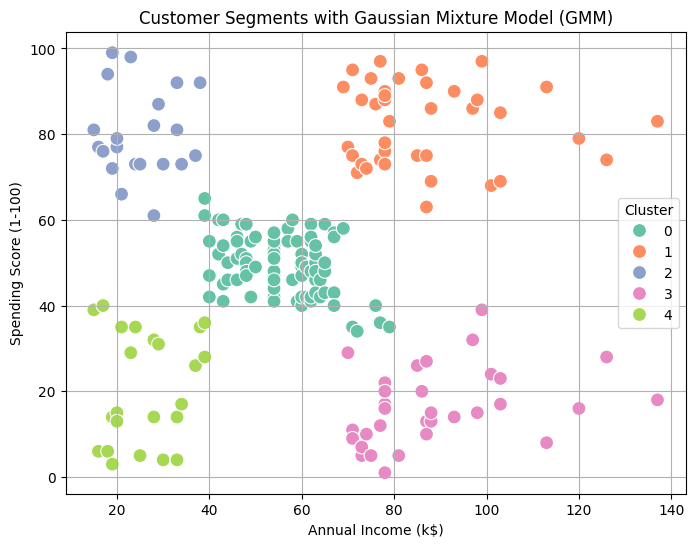

In [ ]:
# Aplicando o gmm

n_components = 5
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

labels = gmm.predict(X_scaled)
probs = gmm.predict_proba(X_scaled)

# Adicionando os clusteres ao dataset para visualização
df['Cluster'] = labels

# Visualização

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    data=df,
    s=100
)

plt.title('Customer Segments with Gaussian Mixture Model (GMM)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)